In [5]:
# Import Library

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import datasets
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [4]:
df = pd.read_excel("https://github.com/risqikhoirul/DataMining/raw/main/Iris%20-%20Semester%203.xlsx")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Memisahkan fitur (features) dan target (label)
X = df.iloc[:, 1:5]  # features
y = df["Species"]    # target

Perintah train_test_split dari scikit-learn digunakan untuk membagi dataset menjadi empat bagian:

X_train: Data fitur untuk pelatihan.
X_test: Data fitur untuk pengujian.
y_train: Data target untuk pelatihan.
y_test: Data target untuk pengujian.
Parameter yang digunakan dalam fungsi ini adalah:

X: Fitur dari dataset.
y: Target dari dataset.
test_size: Persentase data yang akan diambil sebagai data uji. Dalam contoh tersebut, 20% data akan diambil sebagai data uji, dan 80% akan digunakan sebagai data latih.
random_state: Digunakan untuk menentukan seed agar hasil split dapat direproduksi. Dengan menggunakan nilai tertentu, kita dapat memastikan bahwa pembagian data akan sama setiap kali kita menjalankan kode tersebut. Ini berguna untuk membuat hasil yang konsisten dan membandingkan model dengan lebih baik.

In [7]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Memprediksi data uji
y_pred = model.predict(X_test)

In [10]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 1.0


In [11]:
# Membuat deskripsi pohon keputusan
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- PetalLengthCm <= 4.75
|   |   |--- PetalWidthCm <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalWidthCm >  1.65
|   |   |   |--- class: Iris-virginica
|   |--- PetalLengthCm >  4.75
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- PetalLengthCm <= 4.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- PetalLengthCm >  4.95
|   |   |   |   |--- PetalWidthCm <= 1.55
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- PetalWidthCm >  1.55
|   |   |   |   |   |--- PetalLengthCm <= 5.45
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- PetalLengthCm >  5.45
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- PetalLengthCm <= 4.85
|   |   |   |   |--- SepalWidthCm <= 3.10
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- SepalWidthCm >  3.10
|   |   |   |   |   |

In [12]:
# Membuat dan menyimpan gambar pohon keputusan
dot_data = export_graphviz(model, out_file=None, feature_names=list(X.columns), class_names=df["Species"].unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format="png", cleanup=True)

'iris_decision_tree.png'

In [13]:
# Menampilkan gambar pohon keputusan
graph.view("iris_decision_tree")

'iris_decision_tree.pdf'

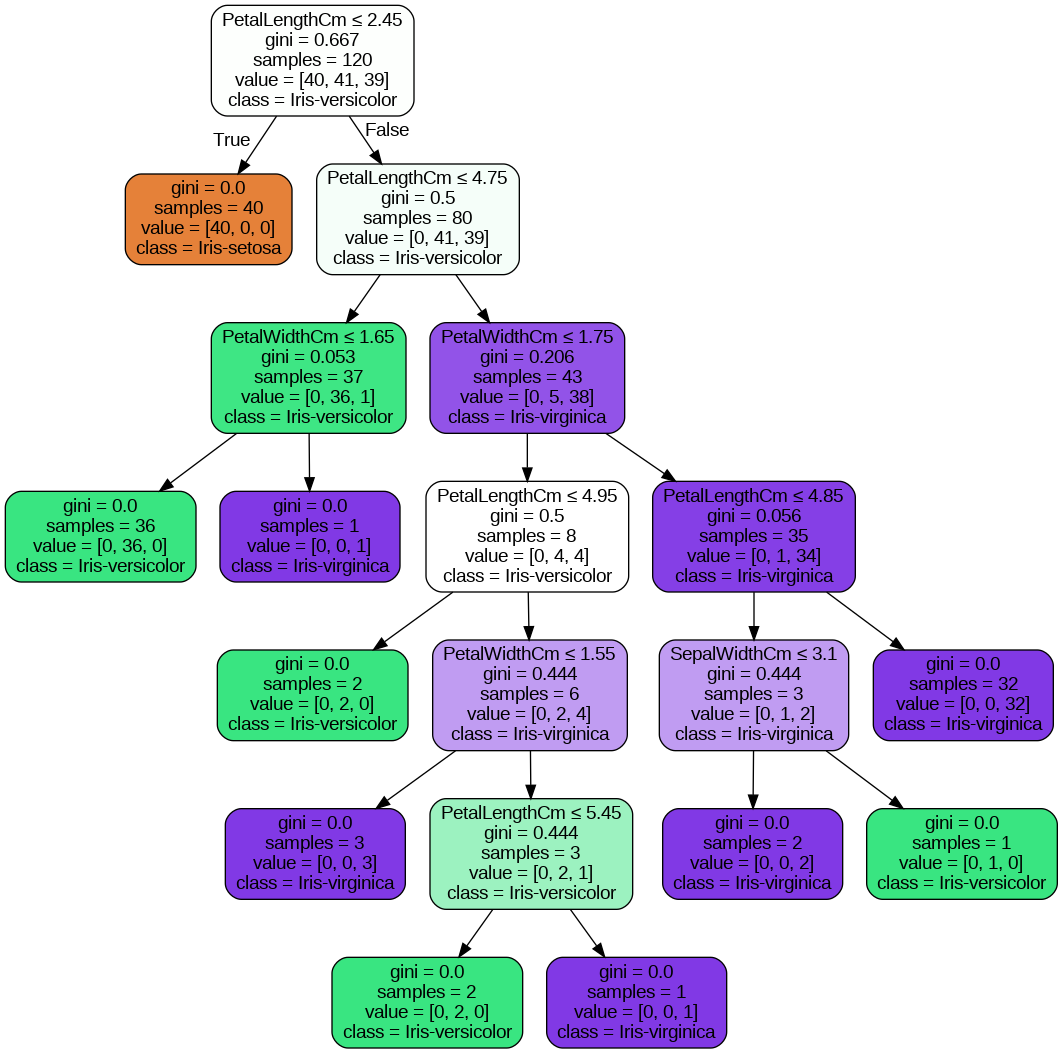

In [14]:
from IPython.display import Image

# Ganti 'iris_decision_tree.png' dengan nama file gambar yang telah Anda buat
Image(filename='iris_decision_tree.png')